In [1]:
# We need to include the home directory in our path, so we can read in
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt

# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html#filtering
#https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html


__From last week__

- DRaw
- Create masks

__From this week__

- Blurring
- Thresholding

## Laod image

In [3]:
fname = os.path.join("..", "data", "img", "trex.png")

In [4]:
image = cv2.imread(fname)

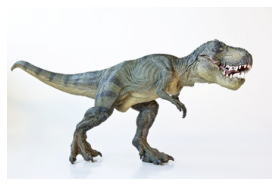

In [5]:
jimshow(image)

## Drawing

cv2.rectangle( image, start_point, end_pont, color, thickness)

In [6]:
cv2.rectangle(image, (50,200), (200, 225), (255, 0, 0), 1)

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 239, 243],
        [237, 238, 242],
        [226, 227, 234]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 239, 243],
        [237, 238, 242],
        [231, 232, 238]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 239, 243],
        [237, 238, 242],
        [234, 235, 240]],

       ...,

       [[246, 241, 238],
        [246, 241, 238],
        [246, 241, 238],
        ...,
        [242, 237, 236],
        [242, 237, 236],
        [242, 237, 236]],

       [[246, 241, 238],
        [246, 241, 238],
        [246, 241, 238],
        ...,
        [243, 238, 237],
        [243, 238, 237],
        [243, 238, 237]],

       [[247, 242, 239],
        [247, 242, 239],
        [247, 242, 239],
        ...,
        [243, 238, 237],
        [243, 238, 237],
        [243, 238, 237]]

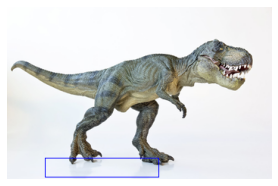

In [7]:
jimshow(image)

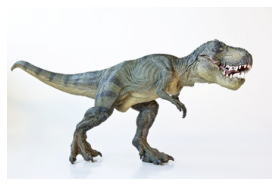

In [8]:
image = cv2.imread(fname)
jimshow(image)

__Draw circle__

In [9]:
#cv2.circle(image, center_cordinates, radius, color, thickness)

In [10]:
image.shape

(228, 350, 3)

In [11]:
(centerX, centerY) =image.shape[1] // 2, image.shape[0] // 2

In [12]:
cv2.circle(image, (centerX, centerY), 50, (0,255,0), 1)

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 239, 243],
        [237, 238, 242],
        [226, 227, 234]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 239, 243],
        [237, 238, 242],
        [231, 232, 238]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 239, 243],
        [237, 238, 242],
        [234, 235, 240]],

       ...,

       [[246, 241, 238],
        [246, 241, 238],
        [246, 241, 238],
        ...,
        [242, 237, 236],
        [242, 237, 236],
        [242, 237, 236]],

       [[246, 241, 238],
        [246, 241, 238],
        [246, 241, 238],
        ...,
        [243, 238, 237],
        [243, 238, 237],
        [243, 238, 237]],

       [[247, 242, 239],
        [247, 242, 239],
        [247, 242, 239],
        ...,
        [243, 238, 237],
        [243, 238, 237],
        [243, 238, 237]]

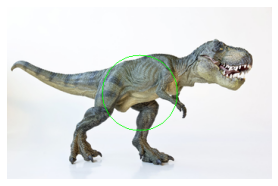

In [13]:
jimshow(image)

In [14]:
cv2.circle(image, (200, 20), 30, (140,255,60), 3)

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 239, 243],
        [237, 238, 242],
        [226, 227, 234]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 239, 243],
        [237, 238, 242],
        [231, 232, 238]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 239, 243],
        [237, 238, 242],
        [234, 235, 240]],

       ...,

       [[246, 241, 238],
        [246, 241, 238],
        [246, 241, 238],
        ...,
        [242, 237, 236],
        [242, 237, 236],
        [242, 237, 236]],

       [[246, 241, 238],
        [246, 241, 238],
        [246, 241, 238],
        ...,
        [243, 238, 237],
        [243, 238, 237],
        [243, 238, 237]],

       [[247, 242, 239],
        [247, 242, 239],
        [247, 242, 239],
        ...,
        [243, 238, 237],
        [243, 238, 237],
        [243, 238, 237]]

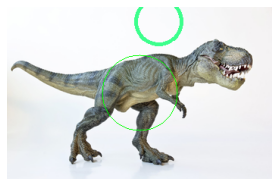

In [15]:
jimshow(image)

## Creating and using masks

In [32]:
image = cv2.imread(fname)

In [33]:
mask = np.zeros(image.shape[:2], dtype="uint8")

In [34]:
cv2.rectangle(mask, (100,100), (200, 200), 255, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [39]:
masked = cv2.bitwise_and(image, image, mask = mask)

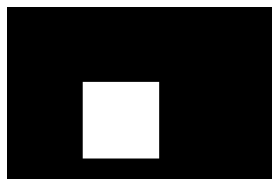

In [40]:
jimshow_channel(mask)

` cv2.bitwise_and(input_image, output_image, mask)

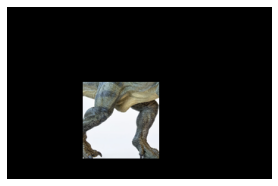

In [43]:
jimshow(cv2.bitwise_and(image, image, mask = mask))

In [41]:
cv2.bitwise_and(image, image, mask)

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 239, 243],
        [237, 238, 242],
        [226, 227, 234]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 239, 243],
        [237, 238, 242],
        [231, 232, 238]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 239, 243],
        [237, 238, 242],
        [234, 235, 240]],

       ...,

       [[246, 241, 238],
        [246, 241, 238],
        [246, 241, 238],
        ...,
        [242, 237, 236],
        [242, 237, 236],
        [242, 237, 236]],

       [[246, 241, 238],
        [246, 241, 238],
        [246, 241, 238],
        ...,
        [243, 238, 237],
        [243, 238, 237],
        [243, 238, 237]],

       [[247, 242, 239],
        [247, 242, 239],
        [247, 242, 239],
        ...,
        [243, 238, 237],
        [243, 238, 237],
        [243, 238, 237]]

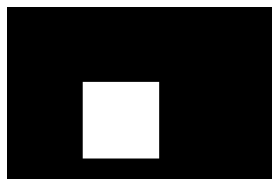

In [42]:
jimshow_channel(mask)

## Group task

We've seen rectangle masks

How would we do a circular mask

In [44]:
image = cv2.imread(fname)

In [45]:
mask = np.zeros(image.shape[:2], dtype="uint8")

In [56]:
cv2.circle(image, (200, 200), 30, (140,255,60), -1)

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 239, 243],
        [237, 238, 242],
        [226, 227, 234]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 239, 243],
        [237, 238, 242],
        [231, 232, 238]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 239, 243],
        [237, 238, 242],
        [234, 235, 240]],

       ...,

       [[246, 241, 238],
        [246, 241, 238],
        [246, 241, 238],
        ...,
        [242, 237, 236],
        [242, 237, 236],
        [242, 237, 236]],

       [[246, 241, 238],
        [246, 241, 238],
        [246, 241, 238],
        ...,
        [243, 238, 237],
        [243, 238, 237],
        [243, 238, 237]],

       [[247, 242, 239],
        [247, 242, 239],
        [247, 242, 239],
        ...,
        [243, 238, 237],
        [243, 238, 237],
        [243, 238, 237]]

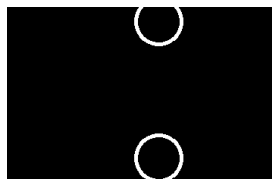

In [57]:
jimshow_channel(mask)

In [95]:
mask = np.zeros(image.shape[:2], dtype="uint8")

In [96]:
#cv2.circle(image, center_cordinates, radius, color, thickness)
cv2.circle(mask, (250, 250), 100, (255,0,0), 1)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ..., 255,   0,   0]], dtype=uint8)

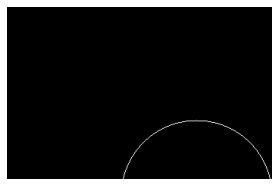

In [97]:
jimshow_channel(mask)

In [98]:
mask = np.zeros(image.shape[:2], dtype="uint8")

In [99]:
(centerX, centerY) = image.shape[1] // 2, image.shape [0] // 2

In [106]:
#cv2.circle(image, center_cordinates, radius, color, thickness)
cv2.circle(mask, (centerX, centerY), 100, (255,0,0), -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

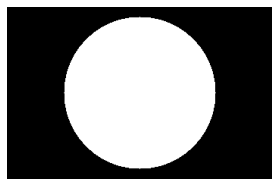

In [107]:
jimshow_channel(mask)

In [108]:
image = cv2.imread(fname)

In [109]:
mask = np.zeros(image.shape[:2], dtype="uint8")

In [110]:
(centerX, centerY) = image.shape[1] // 2, image.shape [0] // 2

In [111]:
#cv2.circle(image, center_cordinates, radius, color, thickness)
cv2.circle(mask, (centerX, centerY), 100, (255,0,0), -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

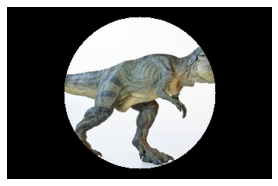

In [112]:
jimshow(cv2.bitwise_and(image, image, mask = mask))

## Blurring

__Average blur__

In [113]:
#parameters image and kernel
blurred = cv2.blur(image, (3,3))

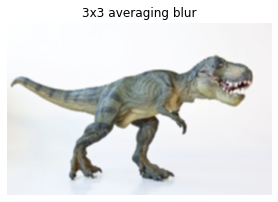

In [114]:
jimshow(blurred, "3x3 averaging blur")

In [115]:
stacked = np.hstack([
    cv2.blur(image, (3,3)),
    cv2.blur(image, (5,5)),
    cv2.blur(image, (7,7))
])

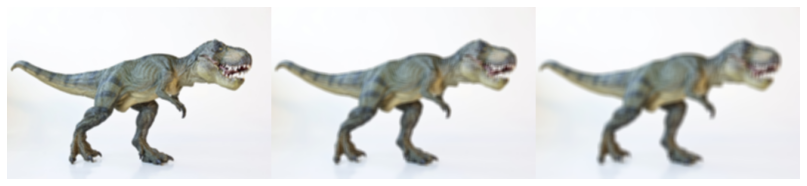

In [116]:
jimshow(stacked)

## Thresholding

In [117]:
image = cv2.imread(fname)

In [118]:
grey_image =cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

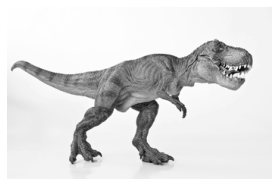

In [120]:
jimshow_channel(grey_image)

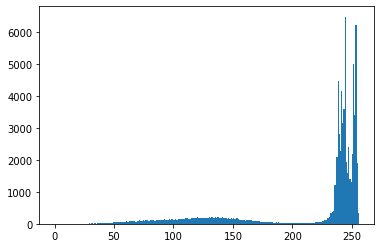

In [119]:
plt.hist(grey_image.flatten(), 256, [0, 256])
plt.show()

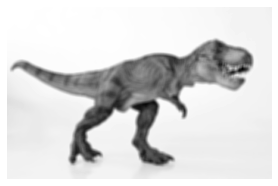

In [121]:
blurred = cv2.blur(grey_image, (5,5))
jimshow_channel(blurred)

#cv2.threshold(image, threshold_value, color, method)

In [122]:
(T_value, threshold)= cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)

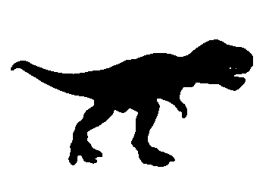

In [123]:
jimshow_channel(threshold)

In [124]:
print(T_value)

200.0


In [131]:
(T_value, thresh_inverted)= cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY_INV)

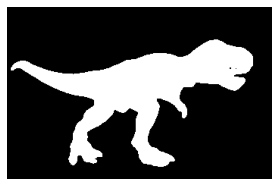

In [132]:
jimshow_channel(thres_inverted)

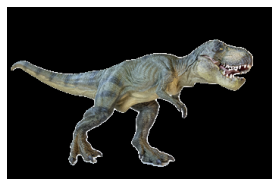

In [134]:
jimshow(cv2.bitwise_and(image, image, mask = thresh_inverted))